In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
model = keras.models.load_model("best-cnn-model.h5")

In [4]:
model.layers

In [5]:
model.layers[0]

In [6]:
model.layers

In [7]:
conv=model.layers[0]
print(conv.weights[0].shape)

(3, 3, 1, 32)


In [4]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

print('train_X shape:', train_X.shape)
print('test_X shape:', test_X.shape)

train_X shape: (60000, 28, 28)
test_X shape: (10000, 28, 28)


In [15]:
import matplotlib.pyplot as plt
plt.hist(conv.weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

AttributeError: 'list' object has no attribute 'reshape'

In [16]:
fig, axs=plt.subplots(2,16.figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.56, vmax=0.5)
        axs[i,j].axis("off")
plt.show()

SyntaxError: invalid decimal literal (3308762360.py, line 1)

In [19]:
no_training_model = keras.Sequential()
no_training_model.add(Conv2D(32, kernel_size=3,
                            input_shape=(28,28,1),
                     padding="same",
                     activation="reru"))

ValueError: Unknown activation function 'reru' cannot be deserialized.

In [ ]:
#### 함수형

In [20]:
print(model.inout)

AttributeError: 'Sequential' object has no attribute 'inout'

In [5]:
train_scaled = train_X.reshape(-1, 28, 28, 1) / 255.0  # float type 변경
test_scaled = test_X.reshape(-1, 28, 28, 1)  / 255.0

In [6]:
print('train_scaled shape:', train_scaled.shape)
print('test_scaled shape:', test_scaled.shape)

train_scaled shape: (60000, 28, 28, 1)
test_scaled shape: (10000, 28, 28, 1)


In [8]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split (
        train_scaled, train_y, test_size=0.2, random_state=42)

In [9]:
print('train_scaled shape:', train_scaled.shape)
print('val_scaled shape:', val_scaled.shape)

train_scaled shape: (48000, 28, 28, 1)
val_scaled shape: (12000, 28, 28, 1)


In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), padding="same", use_bias=True, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", use_bias=True, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

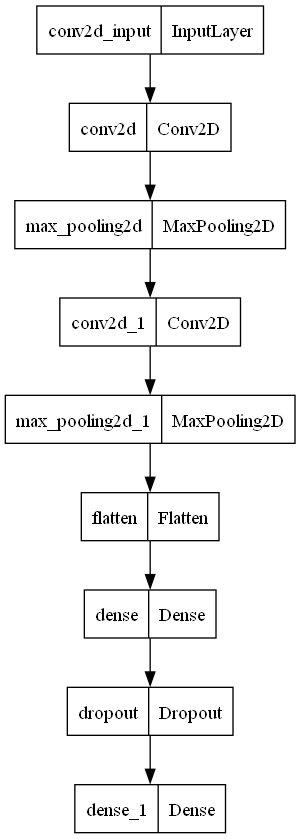

In [14]:
tf.keras.utils.plot_model(model)

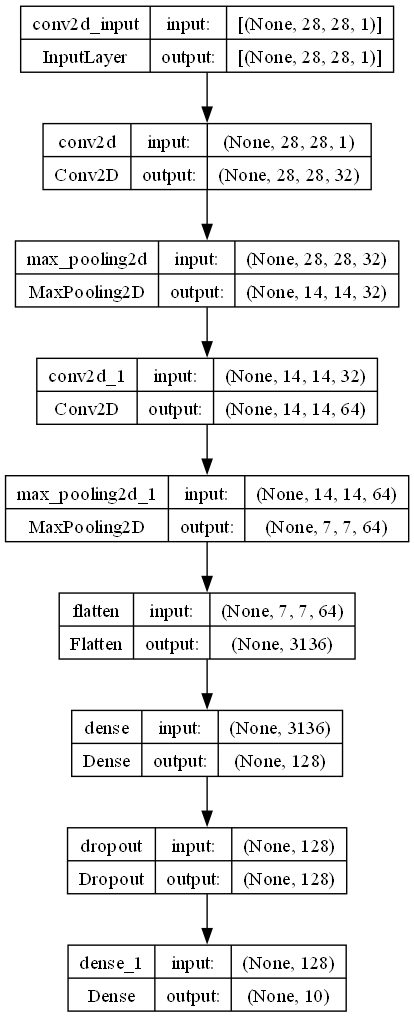

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [17]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best-cnn-model.h5")

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) 

In [18]:
history = model.fit(train_scaled, train_target,epochs=10,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb] )

Epoch 1/10


1500/1500 [==============================] - 23s 14ms/step - loss: 0.5183 - accuracy: 0.8139 - val_loss: 0.3284 - val_accuracy: 0.8798
Epoch 2/10
  10/1500 [..............................] - ETA: 19s - loss: 0.4068 - accuracy: 0.8500

C:\Users\User\.conda\envs\py310tf2\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 21s 14ms/step - loss: 0.3418 - accuracy: 0.8787 - val_loss: 0.2807 - val_accuracy: 0.8962
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2956 - accuracy: 0.8927 - val_loss: 0.2665 - val_accuracy: 0.9039
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2635 - accuracy: 0.9037 - val_loss: 0.2540 - val_accuracy: 0.9075
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2391 - accuracy: 0.9116 - val_loss: 0.2455 - val_accuracy: 0.9128
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2189 - accuracy: 0.9193 - val_loss: 0.2247 - val_accuracy: 0.9191
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2004 - accuracy: 0.9249 - val_loss: 0.2271 - val_accuracy: 0.9196
Epoch 8/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.1864 - accuracy: 0.9300 - val_loss: 0.2332 - val_accura

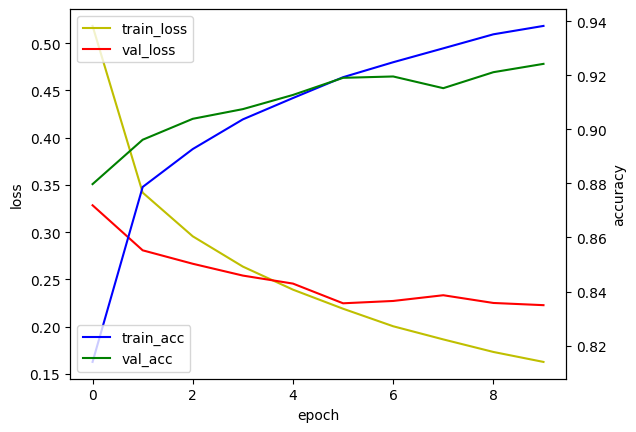

In [19]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(history.history["loss"], "y", label="train_loss")
loss_ax.plot(history.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(history.history["accuracy"], "b", label="train_acc")
acc_ax.plot(history.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [20]:
score = model.evaluate(val_scaled, val_target, verbose=1)
print('val loss:', score[0])
print('val accuracy:', score[1])

375/375 [==============================] - 2s 4ms/step - loss: 0.2227 - accuracy: 0.9243
val loss: 0.2226928323507309
val accuracy: 0.9242500066757202


In [21]:
from matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r") 
plt.show()

SyntaxError: unterminated string literal (detected at line 2) (14840624.py, line 2)

In [ ]:
pred = model.predict(val_scaled[0:1])
print(pred)

In [ ]:
score = model.evaluate(test_scaled, test_y, verbose=1)
print('val loss:', score[0])
print('val accuracy:', score[1])